## PROBLEM STATEMENT ##

### Objective: ###
To categorise the countries using socio-economic and health factors that determine the overall development of the country.
About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

## About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement: ###
HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.

# Data Description

**Column Name**	    **Description**

**country** :	Name of the country

**child_mort** :	Death of children under 5 years of age per 1000 live births

**exports** :	Exports of goods and services per capita. Given as %age of the GDP per capita

**health** :	Total health spending per capita. Given as %age of GDP per capita

**imports** :	Imports of goods and services per capita. Given as %age of the GDP per capita

**Income** :	Net income per person

**Inflation** :	The measurement of the annual growth rate of the Total GDP

**life_expec** :	The average number of years a new born child would live if the current mortality patterns are to remain the same

**total_fer** :	The number of children that would be born to each woman if the current age-fertility rates remain the same.

**gdpp** :	The GDP per capita. Calculated as the Total GDP divided by the total population.

In [11]:
# import required libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [12]:
data = pd.read_csv('Country-data.csv')

In [13]:
data.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [14]:
#lets use contry name as indexda
data.set_index('country', inplace=True)

In [15]:
data.shape

(167, 9)

## Data Exploration ##

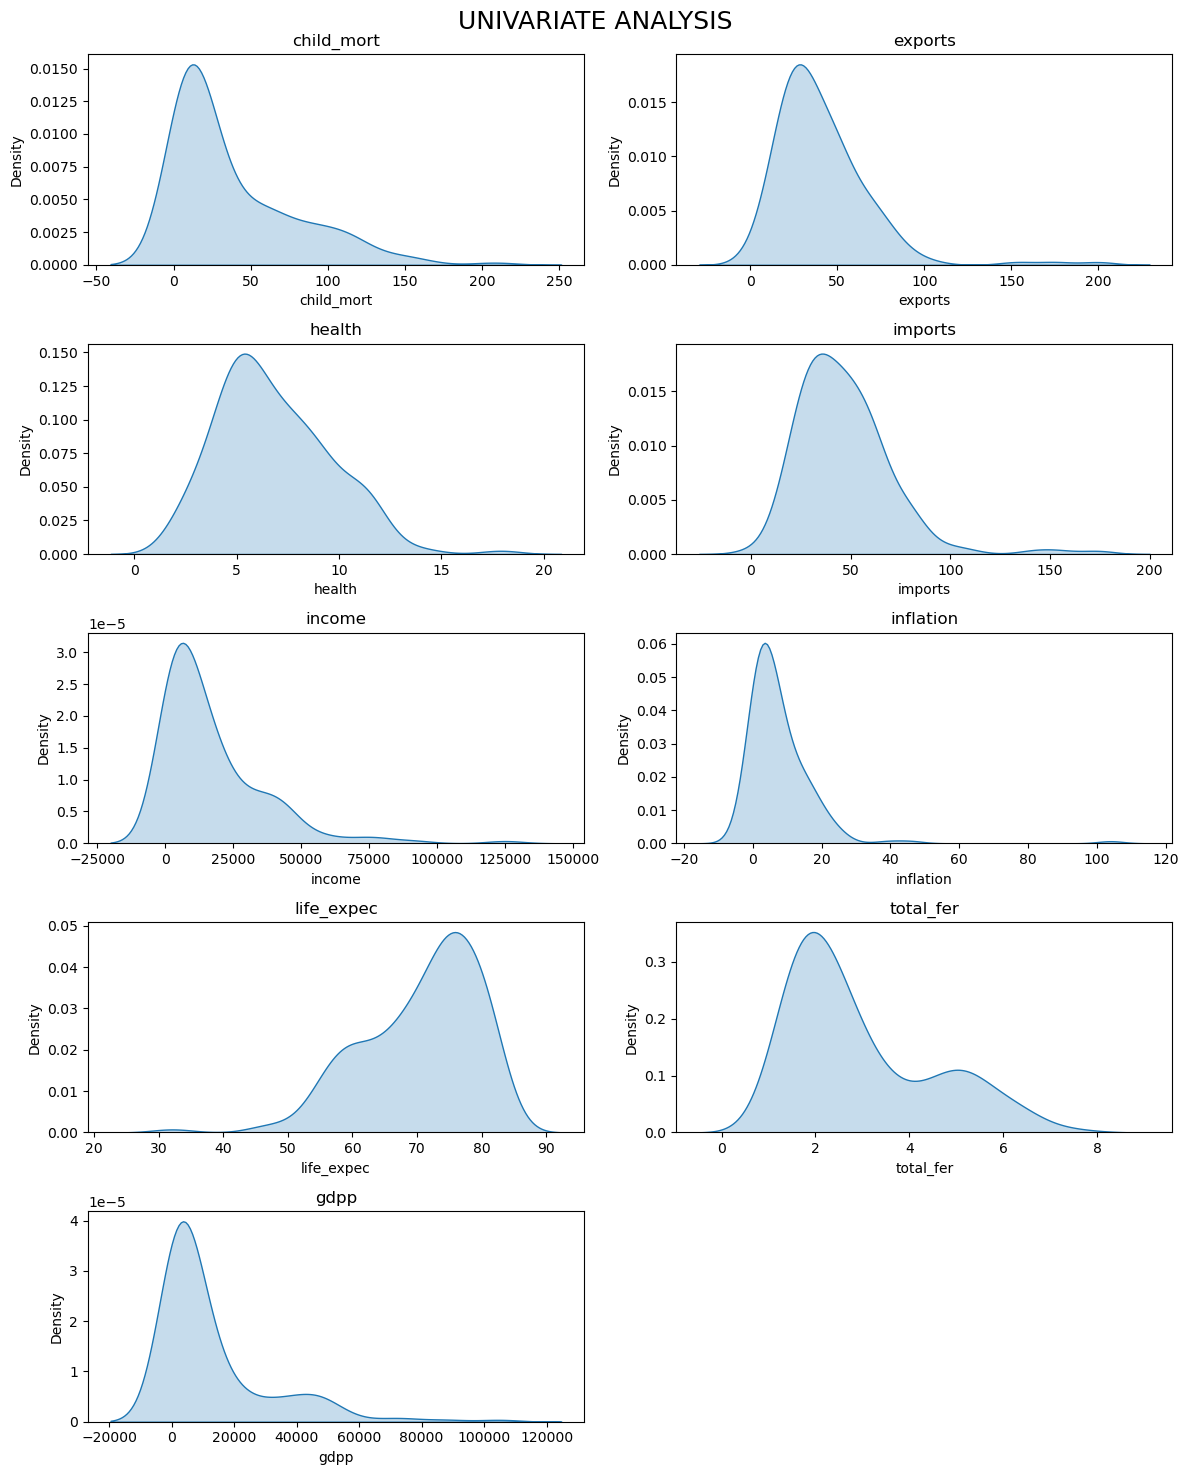

In [17]:
t = 1
plt.figure(figsize = (12,15))
plt.suptitle('UNIVARIATE ANALYSIS',fontsize = 18)
for i in data.columns:
    plt.subplot(5,2,t)
    sns.kdeplot(data=data,x=i,fill = True)
    plt.title(i)
    t +=1

plt.tight_layout()
plt.show()

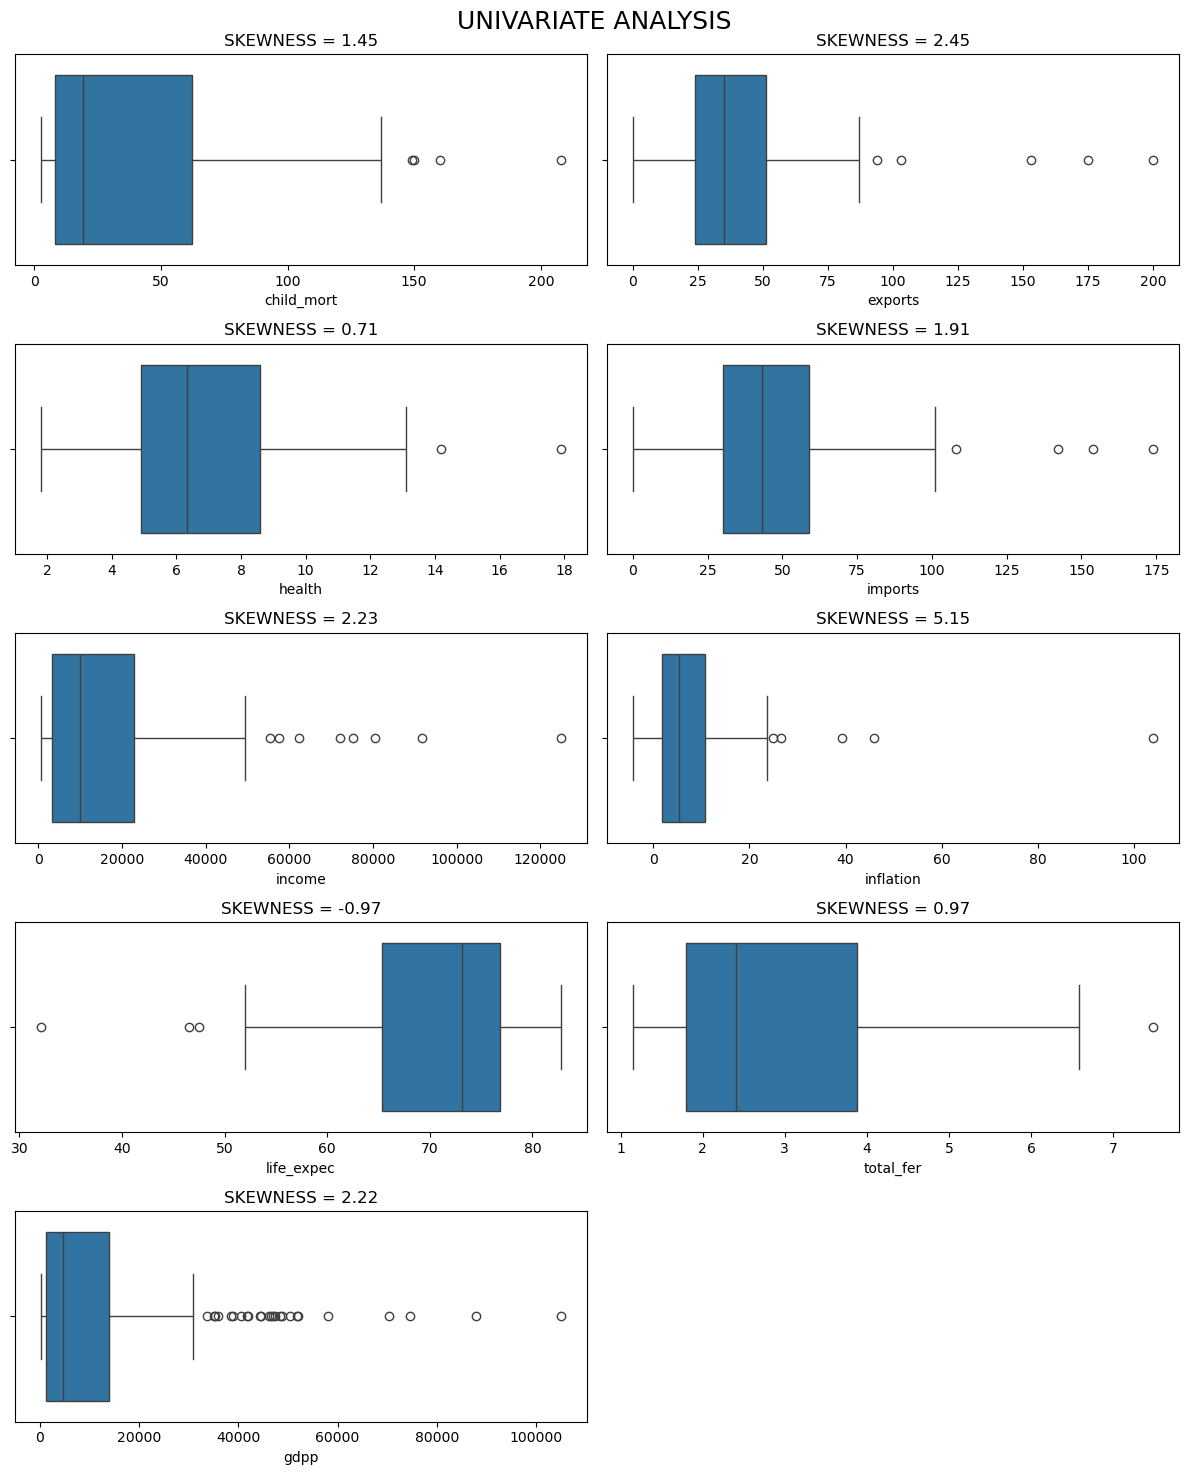

In [18]:
t = 1
plt.figure(figsize = (12,15))
plt.suptitle('UNIVARIATE ANALYSIS',fontsize = 18)
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i,fill = True)
    plt.title(f'SKEWNESS = {round(data[i].skew(),2)}')
    t +=1

plt.tight_layout()
plt.show()

## Multivariate Analysis ##

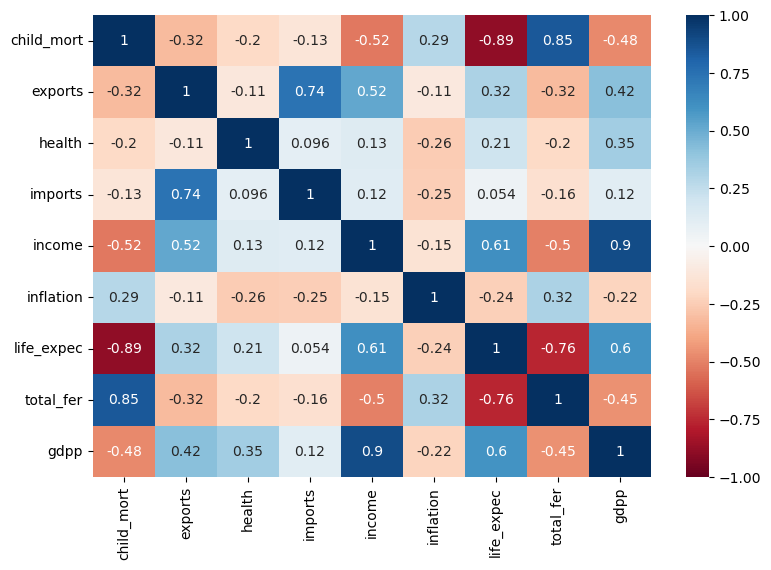

In [20]:
plt.figure(figsize = (9,6))
sns.heatmap(data.corr(),vmin=-1,annot = True,cmap = 'RdBu')
plt.show()

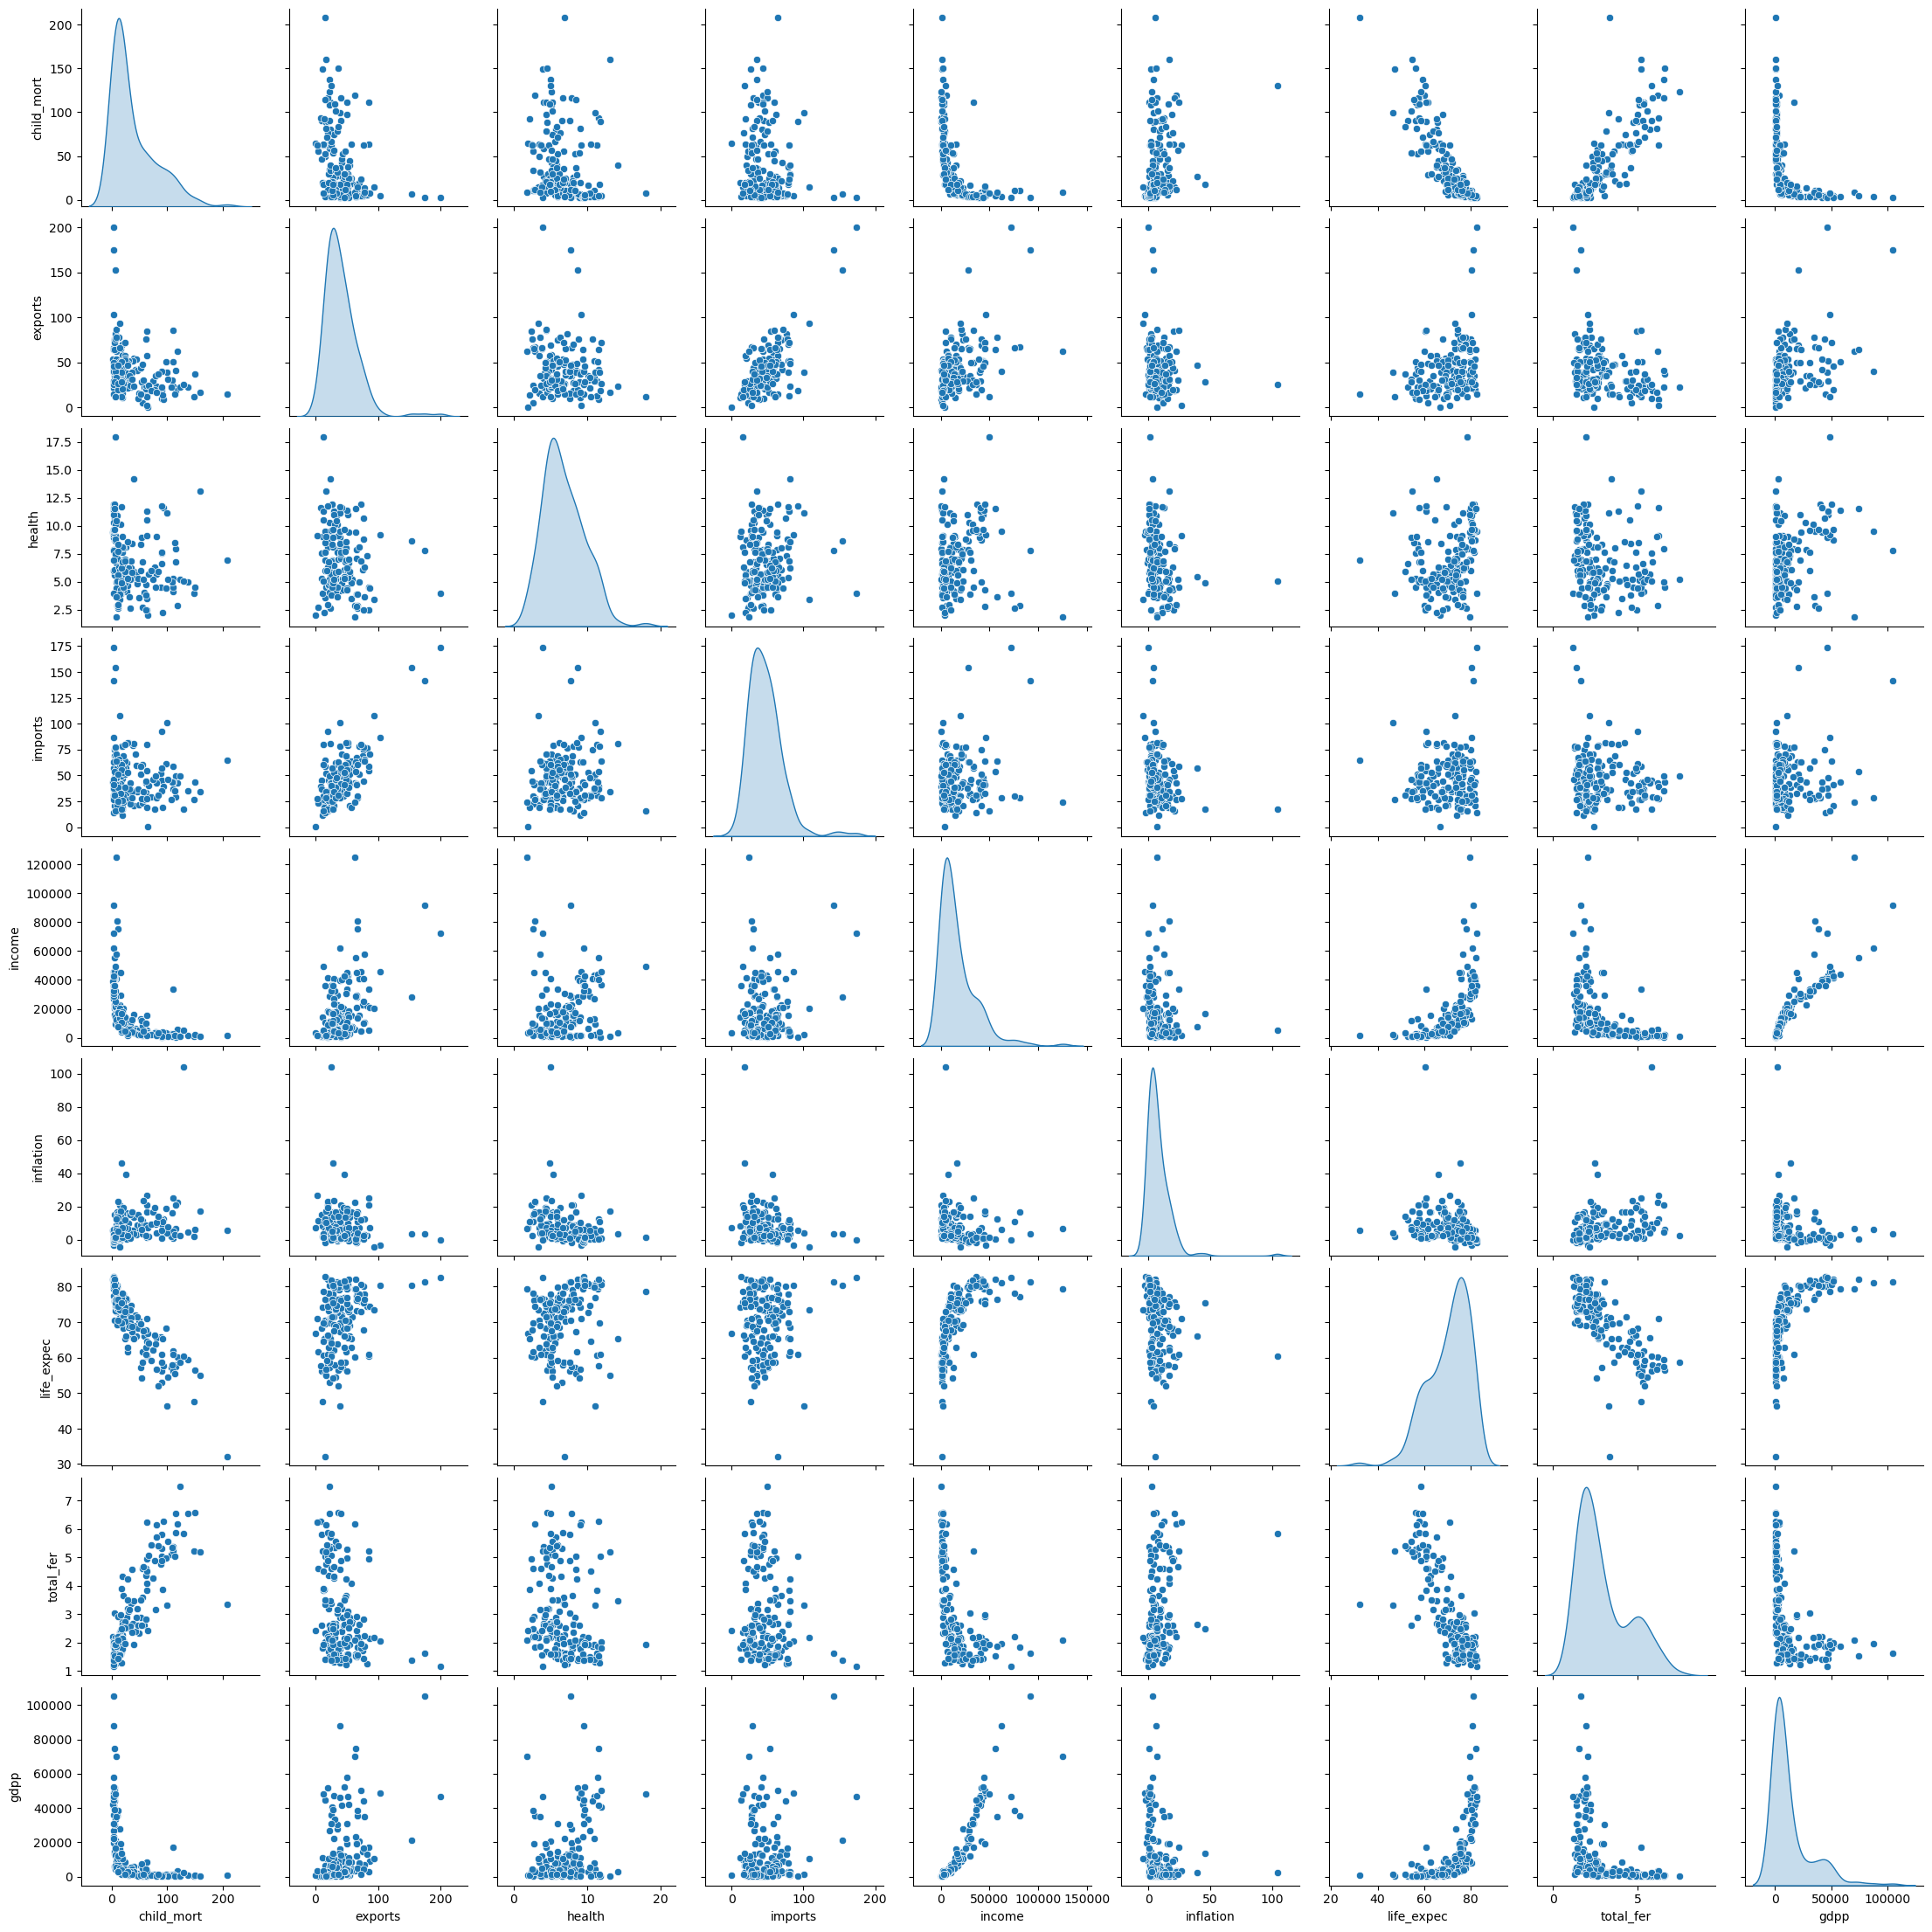

In [21]:
## pair plot
sns.pairplot(data,diag_kind = 'kde')
plt.show()

## DATA PREPROCESSING ## 

In [23]:
#Missing values
data.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

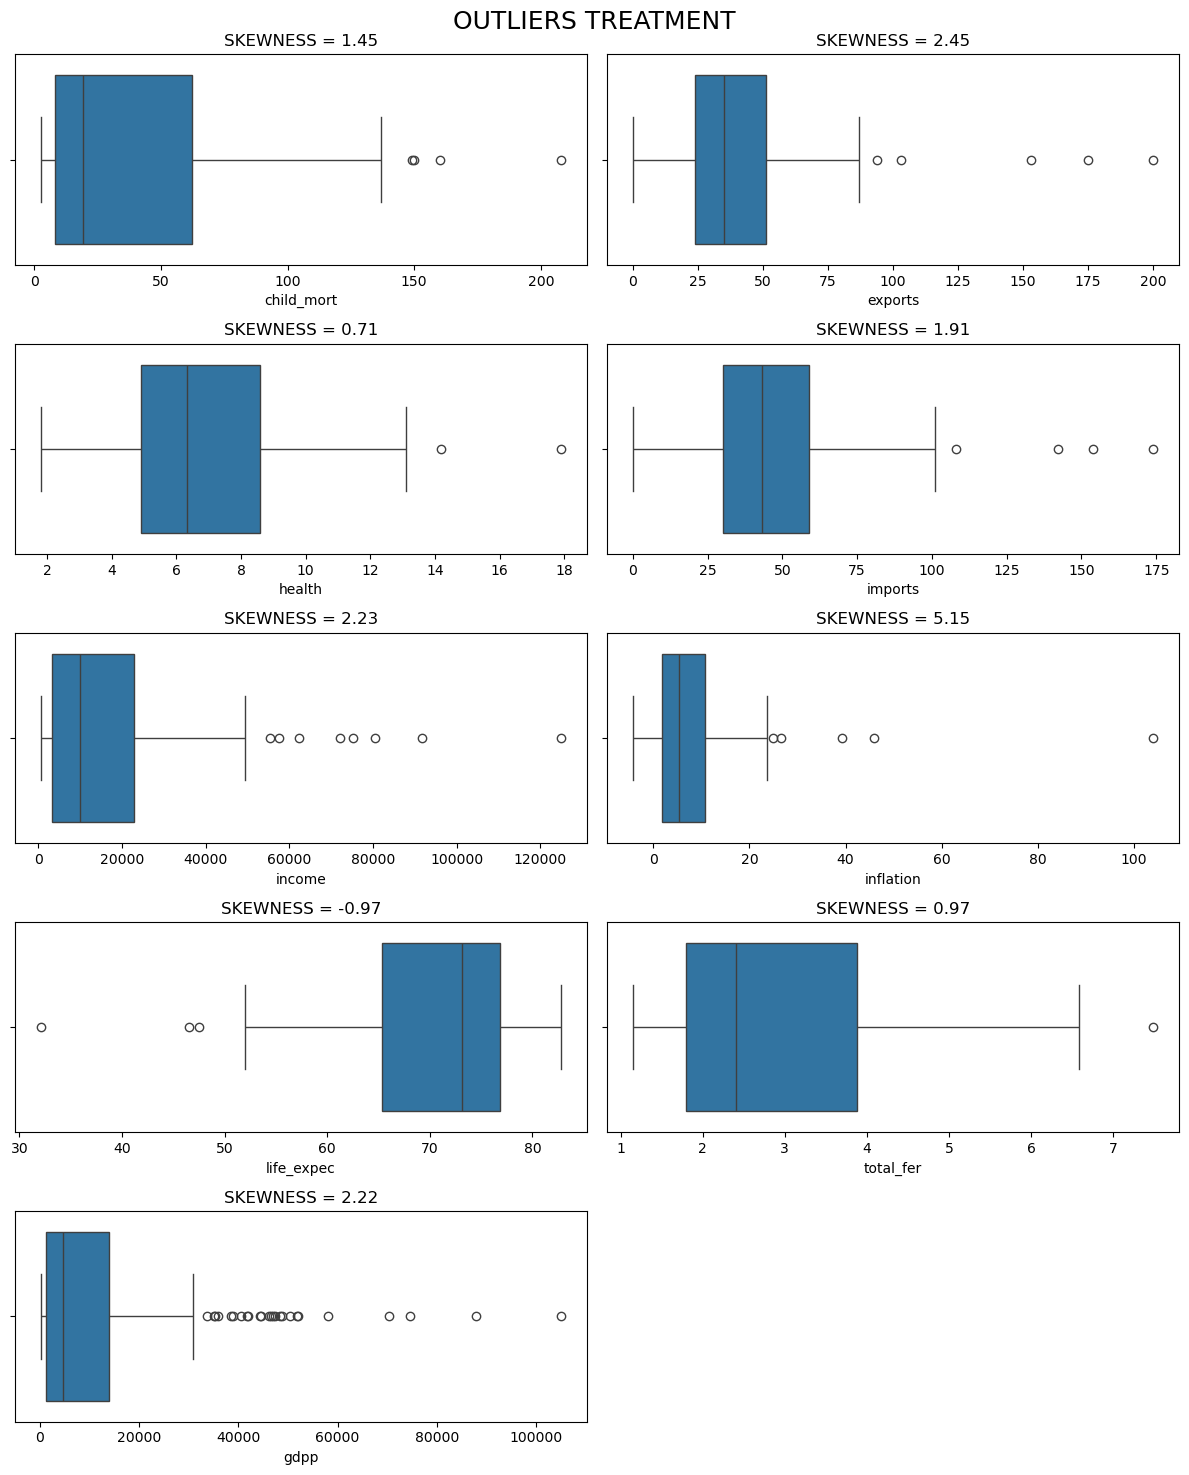

In [24]:
#lets check outliers
#we do have some outliers
t = 1
plt.figure(figsize = (12,15))
plt.suptitle('OUTLIERS TREATMENT',fontsize = 18)
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i,fill = True)
    plt.title(f'SKEWNESS = {round(data[i].skew(),2)}')
    t +=1

plt.tight_layout()
plt.show()

In [25]:
import numpy as np

In [26]:
# lets go with capping to treat the outliers (cap the extreme outliers 2)
for i in data.columns:
    q1,q3 = np.quantile(data[i],[0.25,0.75])
    iqr = q3-q1
    ul,ll = q3+2.5*iqr,q1-2.5*iqr
    data[i] = data[i].apply(lambda x:ul if x>ul else ll if x<ll else x)

In [27]:
#after removing outliers

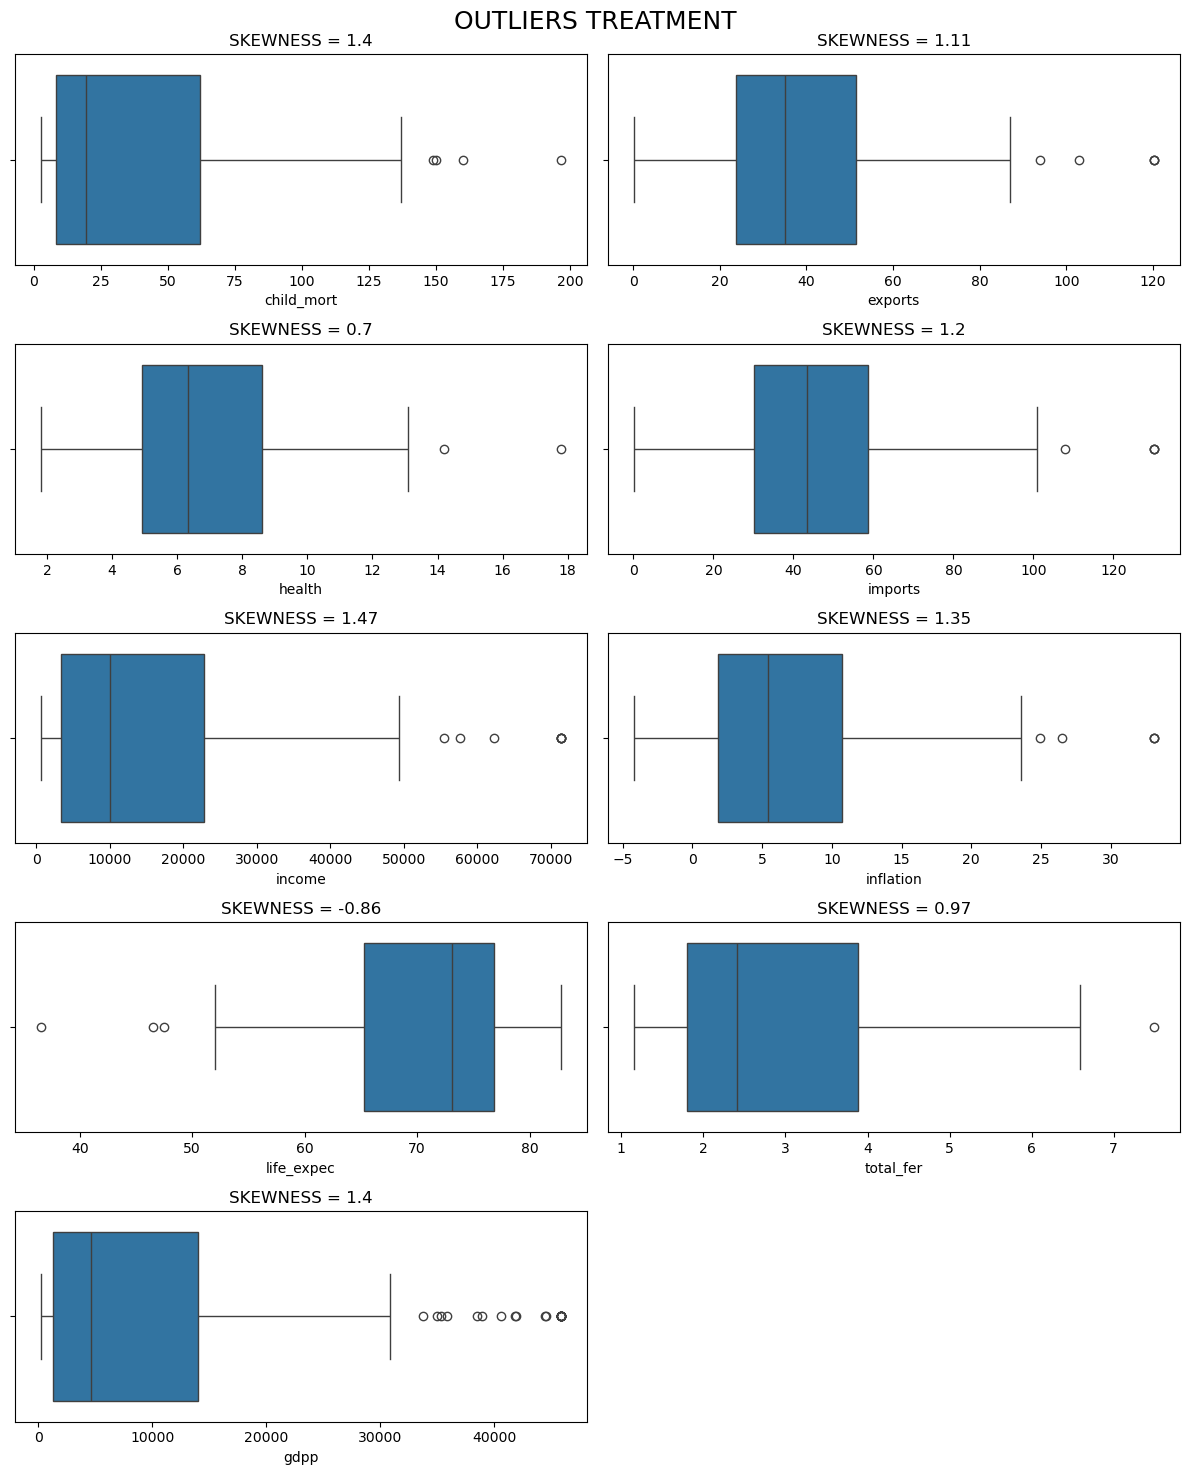

In [28]:
t = 1
plt.figure(figsize = (12,15))
plt.suptitle('OUTLIERS TREATMENT',fontsize = 18)
for i in data.columns:
    plt.subplot(5,2,t)
    sns.boxplot(data=data,x=i,fill = True)
    plt.title(f'SKEWNESS = {round(data[i].skew(),2)}')
    t +=1

plt.tight_layout()
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
data_s = data.copy()

In [32]:
data_s = pd.DataFrame(scaler.fit_transform(data_s),columns = data.columns,index = data.index)

In [33]:
data_s.head()

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.302168 -1.314143  0.279553 -0.068565 -0.878427   
Albania               -0.540991 -0.528460 -0.096883  0.099062 -0.391534   
Algeria               -0.273031 -0.074510 -0.966706 -0.680176 -0.217727   
Angola                 2.023403  0.968702 -1.449130 -0.159174 -0.627373   
Antigua and Barbuda   -0.698761  0.235398 -0.286928  0.565699  0.145102   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.303790   -1.642400   1.902882 -0.767399  
Albania              -0.381016    0.652932  -0.859973 -0.526335  
Algeria               1.225166    0.675771  -0.038404 -0.501118  
Angola                2.096738   -1.197037   2.128151 -0.564502  
Antigua and Barbuda  -0.802968    0.710030  -0.541946  0.026399

## Clustering ##

In [35]:
# step 1: identify the value of k
#Kelbow method

In [36]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [37]:

from sklearn.cluster import KMeans

In [38]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

## Method 1 - Kelbow method

In [40]:
wcss = []
n_clus = range(2,11)
for i in n_clus:
    mod = KMeans(n_clusters = i)
    mod.fit(data_s)
    wcss.append(mod.inertia_)

In [41]:
wcss

[1018.5342980318554,
 790.2705328063224,
 700.0337885986696,
 634.1565031366326,
 559.361550111078,
 533.866657184151,
 486.49336939034777,
 431.541279421643,
 396.2257544289187]

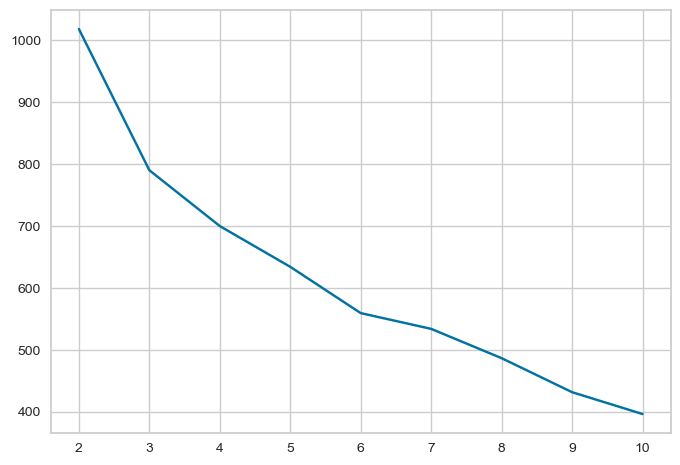

In [42]:
plt.plot(n_clus,wcss)
plt.show()

In [43]:
# yellow brick library to make klbow plot
keblow = KElbowVisualizer(estimator = KMeans(),k=10)

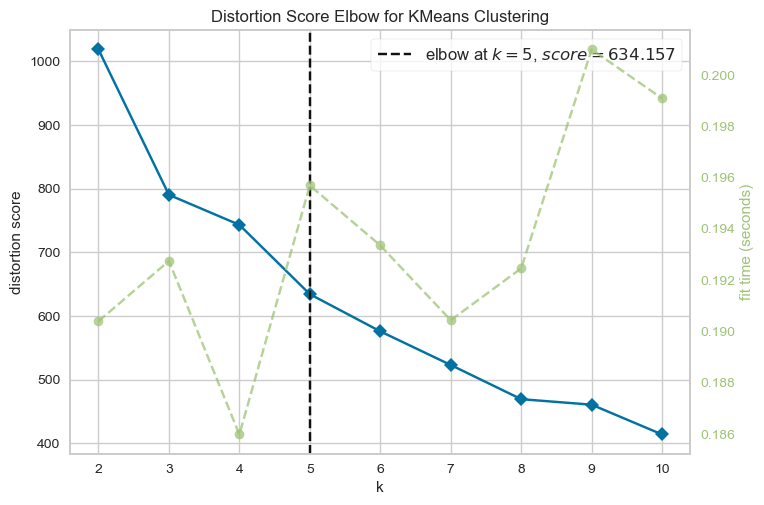

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
keblow.fit(data_s)
keblow.show()

## Method 2 - Silhoutte visualizer ##

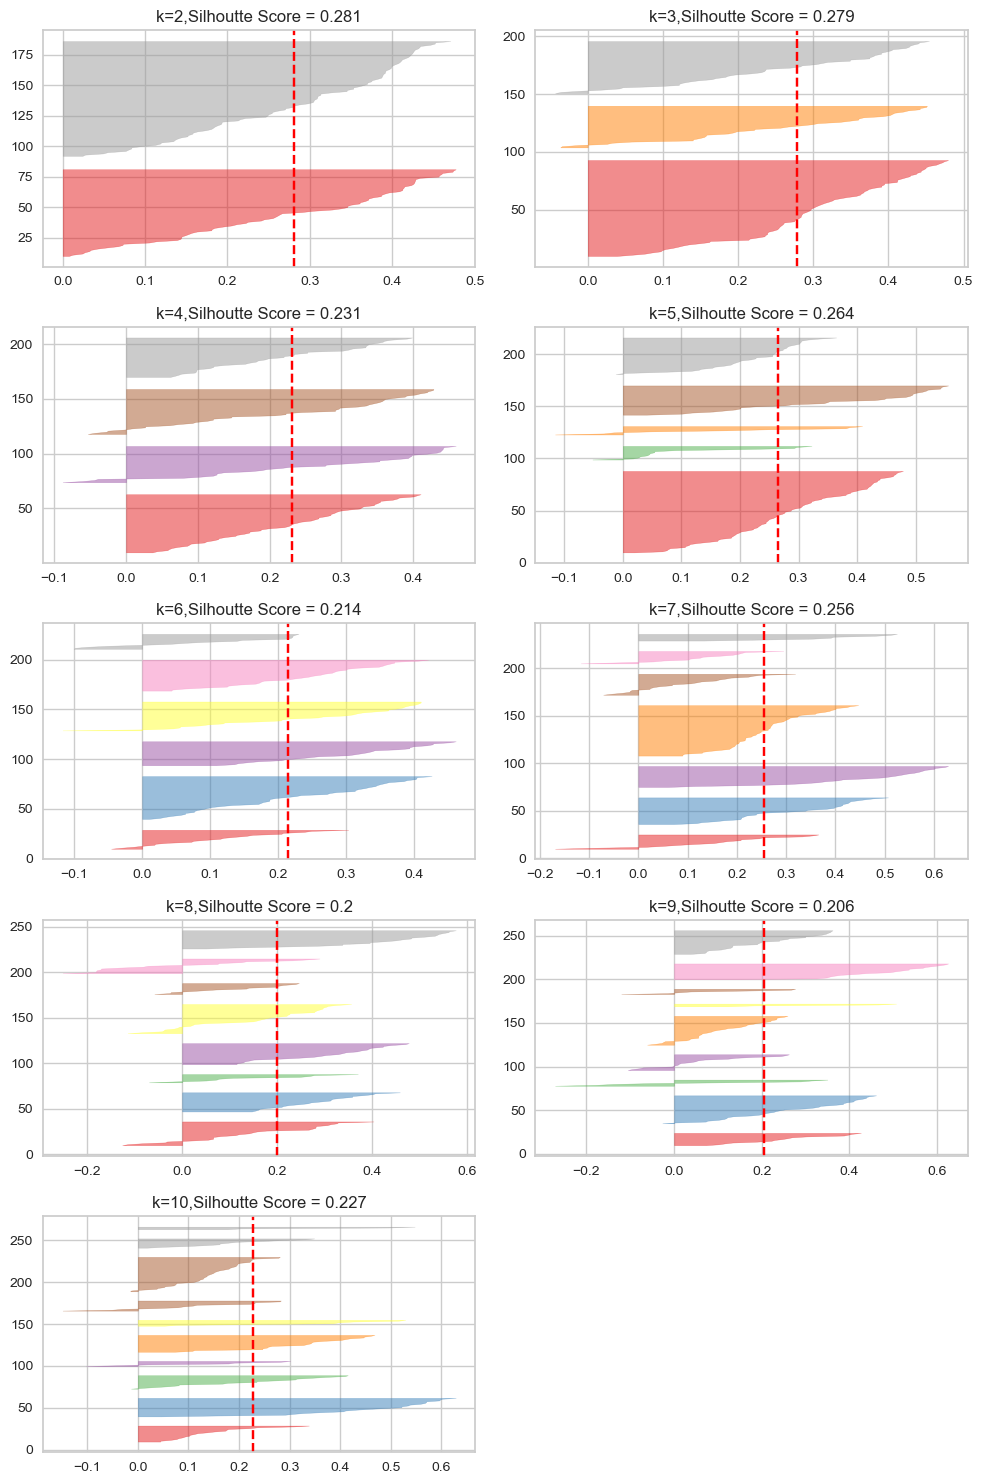

In [46]:
t = 1
plt.figure(figsize = (10,15))
for i in n_clus:
    plt.subplot(5,2,t)
    model = KMeans(n_clusters = i)
    sil_viz = SilhouetteVisualizer(estimator = model)
    sil_viz.fit(data_s)
    plt.title(f'k={i},Silhoutte Score = {round(sil_viz.silhouette_score_,3)}')
    t += 1
plt.tight_layout()
plt.show()

In [47]:
# we will go with k = 3

In [48]:
# Fit a final model with K=3
final_Kmeans = KMeans(n_clusters = 3)

In [49]:
labels_Kmean = final_Kmeans.fit_predict(data_s)

In [50]:
labels_Kmean

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 2,
       1, 2, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 1, 0, 0, 1,
       1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       2, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2,
       1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0,
       2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1])

## Visualize these clusters ##

In [52]:
data['Label'] = labels_Kmean

In [53]:
data.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp  Label  
country                                                     
Afghanistan                56.2       5.82    553.0      1  
Albania                    76.3       1.65   4090.0      0  
Algeria                    76.5       2.89   4460.0      1  
Angola                     60.1       6.16   3530.0      1  
Antigua and Barbuda        76.8       2.13  12200.0      0

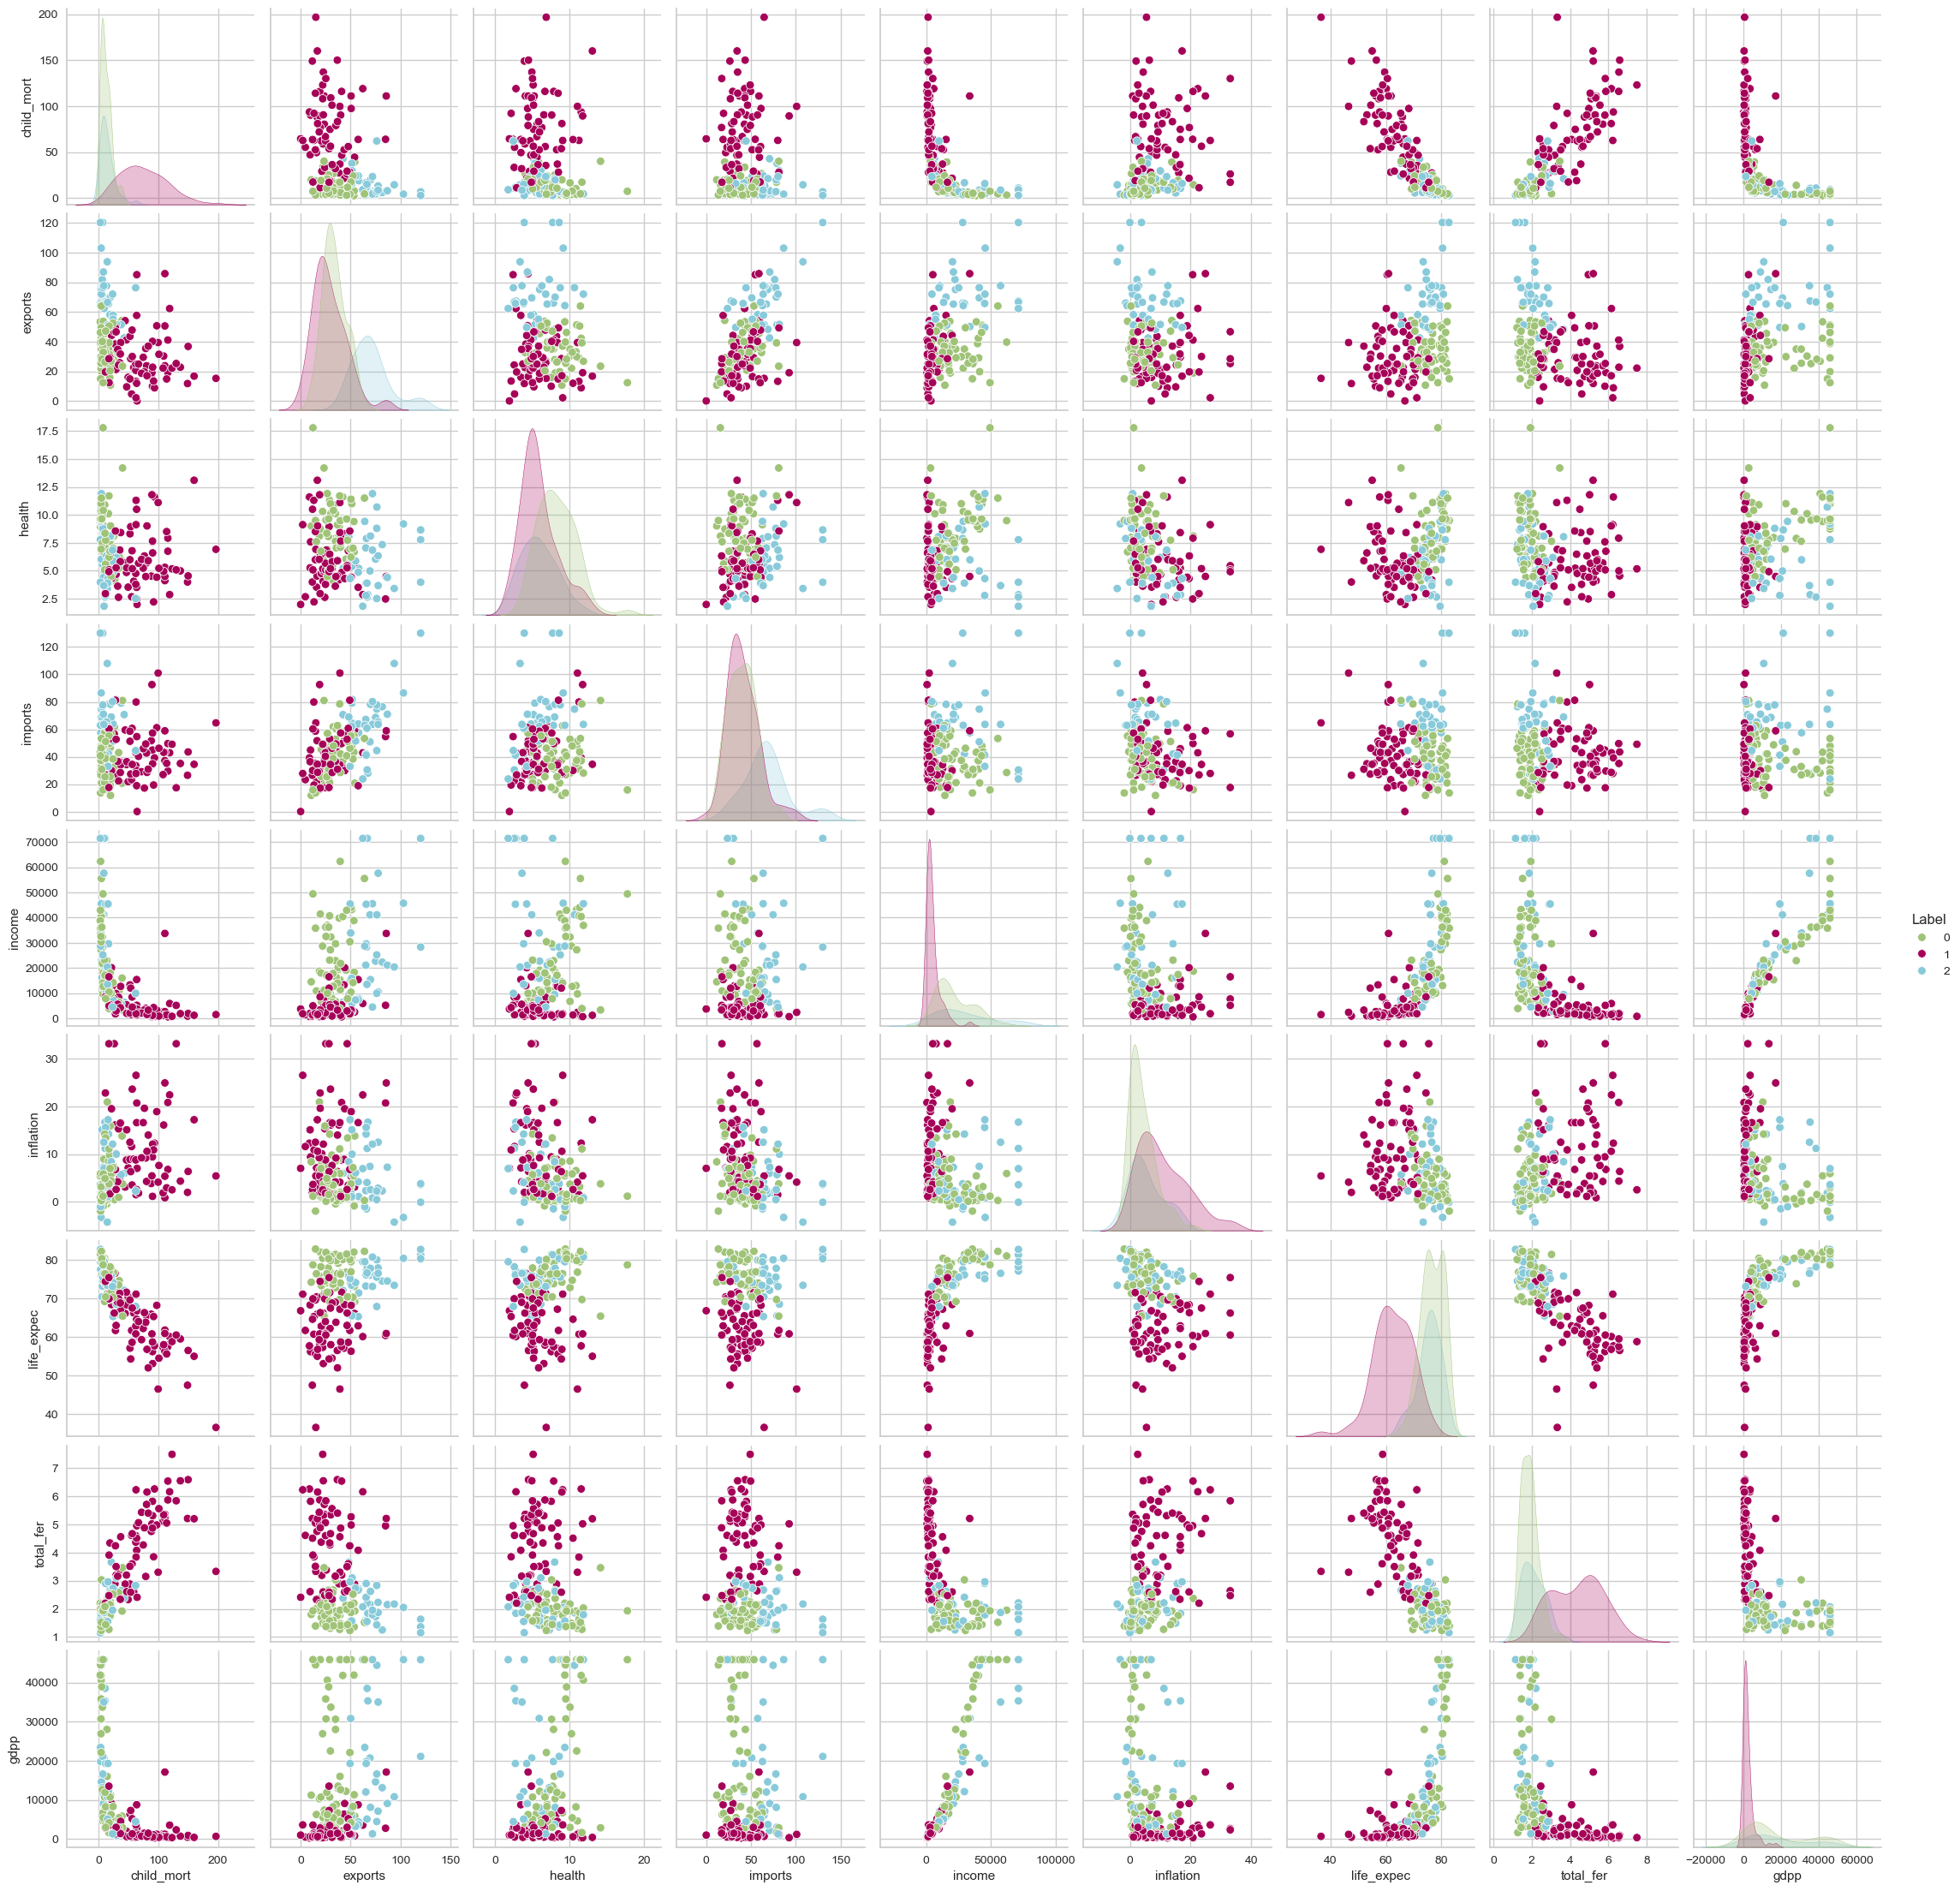

In [54]:
sns.pairplot(data, hue='Label',diag_kind = 'kde',palette = ['g','m','c'])

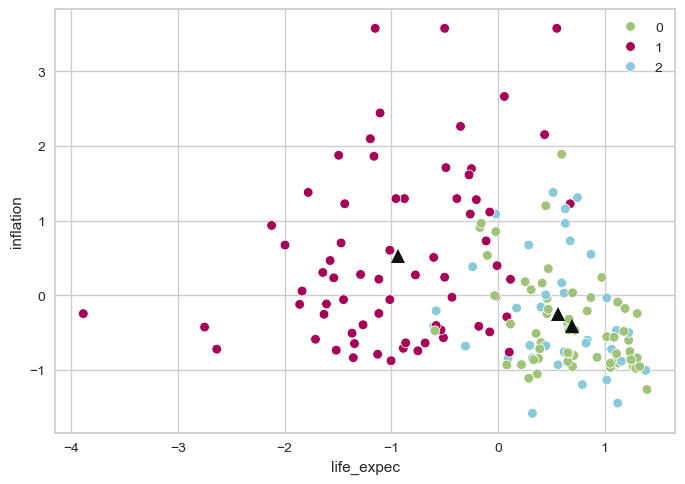

In [55]:
#Life Expectancy vs inflation
sns.scatterplot(data = data_s,x = 'life_expec',y='inflation',hue=labels_Kmean,palette = ['g','m','c'])
centroids = final_Kmeans.cluster_centers_
for i in range(3):
    plt.plot(centroids[i][6],centroids[i][5],marker='^',color = 'k',ms = 10)
plt.show() 

In [56]:
#lets Visualize the centroid also 
final_Kmeans.cluster_centers_

array([[-0.645161  , -0.27902709,  0.55501313, -0.30948257,  0.30979045,
        -0.41698382,  0.69179561, -0.70363117,  0.4406148 ],
       [ 0.91552161, -0.478778  , -0.32917266, -0.24587476, -0.69414423,
         0.5183365 , -0.93682191,  0.95289507, -0.65139532],
       [-0.60149966,  1.34747524, -0.32505602,  0.97047035,  0.75661622,
        -0.25388878,  0.56250167, -0.57220898,  0.45883147]])

In [57]:
data_s.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Aggloromative Clustering

In [59]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster.hierarchy import dendrogram,linkage ,cophenet

In [60]:
#cophentic correlation coeficient

In [61]:
#Actual Distance and linkage distance 

In [62]:
data_s.shape

(167, 9)

In [63]:
#step1 -create a distance matrix
dist_mat = euclidean_distances(data_s)
dist_mat.shape

(167, 167)

In [64]:
dist_mat

array([[0.        , 4.22497166, 4.05512607, ..., 4.81943201, 2.93131062,
        1.70971699],
       [4.22497166, 0.        , 2.21987426, ..., 2.68256614, 3.71500907,
        4.40647111],
       [4.05512607, 2.21987426, 0.        , ..., 3.0222937 , 2.15156181,
        3.65903186],
       ...,
       [4.81943201, 2.68256614, 3.0222937 , ..., 0.        , 3.86071845,
        4.55968616],
       [2.93131062, 3.71500907, 2.15156181, ..., 3.86071845, 0.        ,
        2.4025262 ],
       [1.70971699, 4.40647111, 3.65903186, ..., 4.55968616, 2.4025262 ,
        0.        ]])

In [65]:
#step 2: using distance matrix lets create linkage matrix
link_matrix = linkage(dist_mat,method = 'ward')

In [66]:
link_matrix

array([[ 41.        , 121.        ,   1.44272406,   2.        ],
       [  8.        ,  44.        ,   1.79789272,   2.        ],
       [ 75.        , 158.        ,   1.89770657,   2.        ],
       [ 34.        , 119.        ,   2.27401464,   2.        ],
       [  4.        ,  24.        ,   2.47323943,   2.        ],
       [ 17.        ,  28.        ,   2.49857212,   2.        ],
       [ 48.        ,  61.        ,   2.49969821,   2.        ],
       [ 53.        , 144.        ,   2.5835313 ,   2.        ],
       [ 29.        ,  54.        ,   2.58883697,   2.        ],
       [ 50.        , 116.        ,   2.69116158,   2.        ],
       [ 80.        , 129.        ,   2.7425147 ,   2.        ],
       [ 71.        , 125.        ,   2.75089707,   2.        ],
       [ 23.        ,  82.        ,   2.75499399,   2.        ],
       [ 60.        , 122.        ,   2.80044691,   2.        ],
       [ 13.        , 167.        ,   2.83607045,   3.        ],
       [100.        , 171

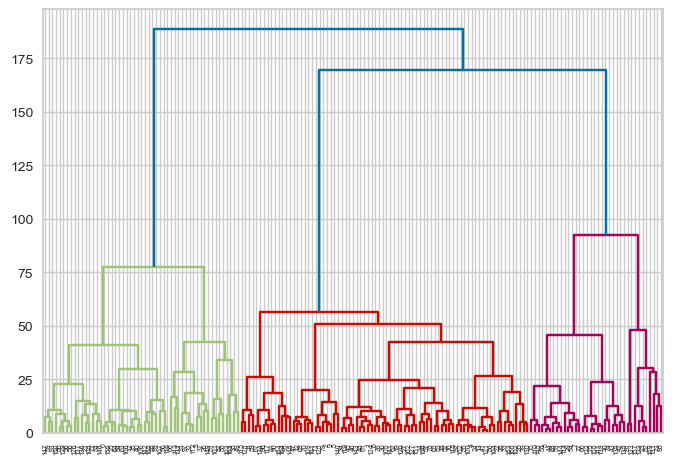

In [67]:
#step 3: create a dendrogram
dendrogram(link_matrix)
plt.show()

In [68]:
#calculate cophenetic correlation coeficient 
actual_dist = dist_mat[np.triu_indices(167,k=1)]
actual_dist  

array([4.22497166, 4.05512607, 3.50657505, ..., 3.86071845, 4.55968616,
       2.4025262 ])

In [69]:
cophenet(link_matrix,actual_dist)

(0.5938368934086127,
 array([188.49913764, 188.49913764,  77.22355444, ..., 188.49913764,
        188.49913764,  29.81494541]))

In [70]:
#hence we can go with wards linkage with k = 3

In [71]:
final_agglo = AgglomerativeClustering(n_clusters = 3)

In [72]:
labels_agglo = final_agglo.fit_predict(data_s)

In [73]:
silhouette_score(data_s,labels_agglo)

0.26372599816303177

<Axes: xlabel='life_expec', ylabel='inflation'>

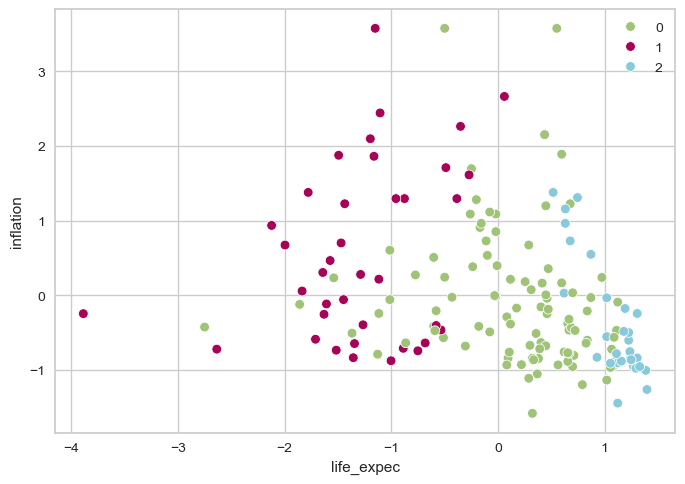

In [74]:
 sns.scatterplot(data = data_s,x = 'life_expec',y='inflation',hue=labels_agglo,palette = ['g','m','c'])

## Business interpretation

In [76]:
data.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp  Label  
country                                                     
Afghanistan                56.2       5.82    553.0      1  
Albania                    76.3       1.65   4090.0      0  
Algeria                    76.5       2.89   4460.0      1  
Angola                     60.1       6.16   3530.0      1  
Antigua and Barbuda        76.8       2.13  12200.0      0

In [77]:
data.groupby(by='Label').mean().T

Label                  0            1             2
child_mort     12.440323    74.760662     14.183784
exports        33.714516    29.138221     70.977703
health          8.333710     5.914412      5.925676
imports        39.582258    40.986263     67.834459
income      21914.193548  4759.014706  29549.527027
inflation       4.230016    10.990809      5.408919
life_expec     76.640323    62.378676     75.508108
total_fer       1.885968     4.386176      2.084324
gdpp        18277.580645  2255.058824  18544.864865

In [78]:
label_map = {0:'Developing',1:'Developed',2:'Underdeveloped'}

In [79]:
data['Label'] = data['Label'].map(label_map)

In [80]:
data.head()

child_mort  exports  health  imports   income  inflation  \
country                                                                         
Afghanistan                90.2     10.0    7.58     44.9   1610.0       9.44   
Albania                    16.6     28.0    6.55     48.6   9930.0       4.49   
Algeria                    27.3     38.4    4.17     31.4  12900.0      16.10   
Angola                    119.0     62.3    2.85     42.9   5900.0      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9  19100.0       1.44   

                     life_expec  total_fer     gdpp       Label  
country                                                          
Afghanistan                56.2       5.82    553.0   Developed  
Albania                    76.3       1.65   4090.0  Developing  
Algeria                    76.5       2.89   4460.0   Developed  
Angola                     60.1       6.16   3530.0   Developed  
Antigua and Barbuda        76.8       2.13  12200.0  Developing

In [81]:
#Underdeveloped 
data[data['Label'] == 'Underdeveloped'].index

Index(['Bahrain', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Brunei', 'Cyprus',
       'Czech Republic', 'Estonia', 'Fiji', 'Guyana', 'Hungary', 'Ireland',
       'Jordan', 'Kuwait', 'Kyrgyz Republic', 'Libya', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius',
       'Netherlands', 'Oman', 'Panama', 'Paraguay', 'Qatar', 'Saudi Arabia',
       'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'Thailand',
       'Turkmenistan', 'United Arab Emirates', 'Vietnam'],
      dtype='object', name='country')

In [82]:
#developed
data[data['Label']=='Developed'].index

Index(['Afghanistan', 'Algeria', 'Angola', 'Bangladesh', 'Benin', 'Bolivia',
       'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Cote d'Ivoire', 'Egypt', 'Equatorial Guinea', 'Eritrea',
       'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'India', 'Indonesia', 'Iraq', 'Kazakhstan', 'Kenya',
       'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa',
       'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa',
       'Sri Lanka', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Tonga', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Yemen',
       'Zambia'],
      dtype='object', name='country')

In [83]:
#developing
data[data['Label']=='Developing'].index

Index(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Barbados',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Finland', 'France',
       'Georgia', 'Germany', 'Greece', 'Grenada', 'Iceland', 'Iran', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Latvia', 'Lebanon', 'Macedonia, FYR',
       'Micronesia, Fed. Sts.', 'Moldova', 'Montenegro', 'Morocco',
       'New Zealand', 'Norway', 'Peru', 'Poland', 'Portugal', 'Romania',
       'Russia', 'Serbia', 'South Korea', 'Spain',
       'St. Vincent and the Grenadines', 'Suriname', 'Sweden', 'Switzerland',
       'Tunisia', 'Turkey', 'Ukraine', 'United Kingdom', 'United States',
       'Uruguay'],
      dtype='object', name='country')

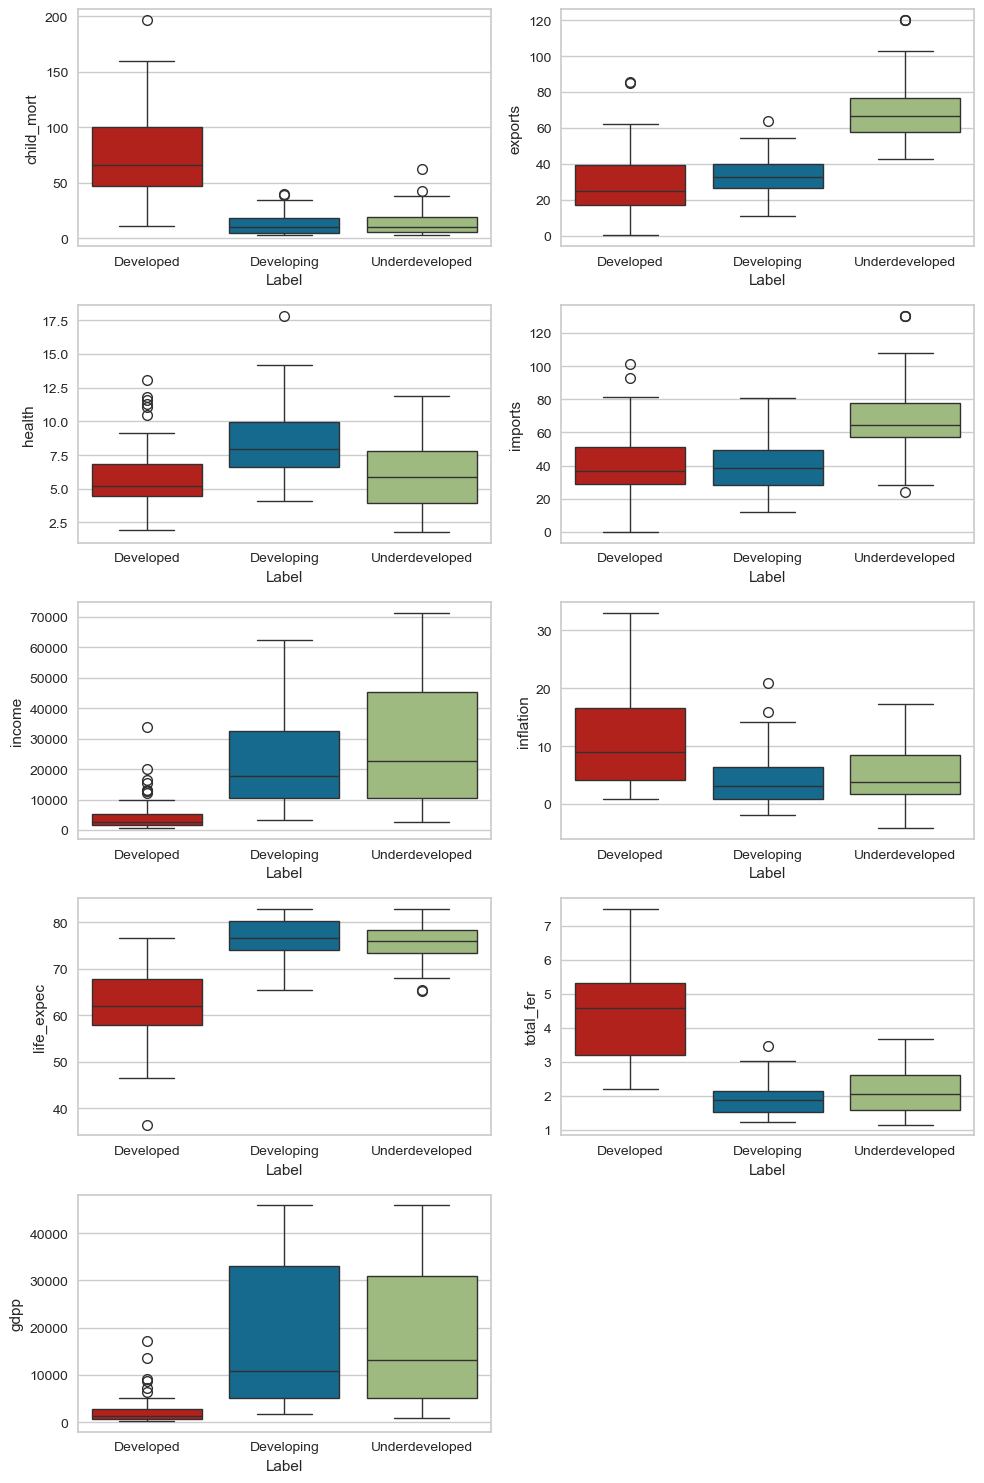

In [84]:
#visualize the parameters in each cluster
t = 1
plt.figure(figsize=(10,15))
for i in data:
    if i != 'Label':
        plt.subplot(5,2,t)
        sns.boxplot(data=data,y=i,x='Label',palette=['r','b','g'])
        t+=1
plt.tight_layout()
plt.show()
        

# world map

In [86]:
import plotly.express as px

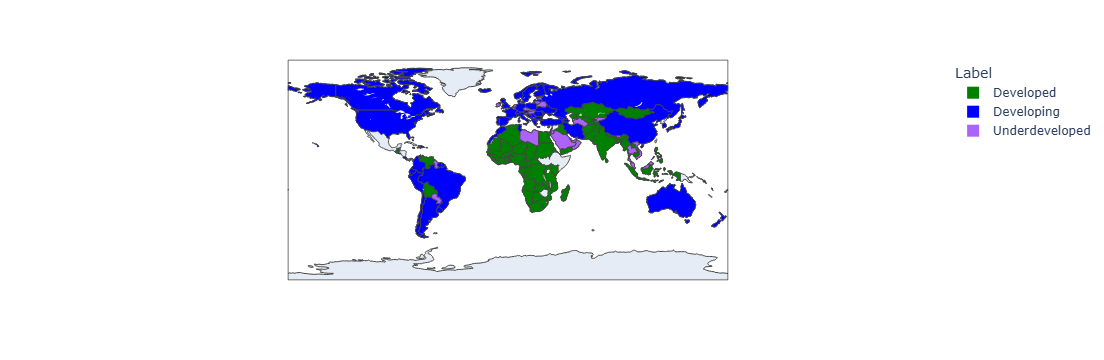

In [87]:
px.choropleth(data_frame=data,locationmode='country names',locations=data.index,color='Label',
            color_discrete_map = {'Developed':'green','Developing':'blue','underdeveloped':'red'})